In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

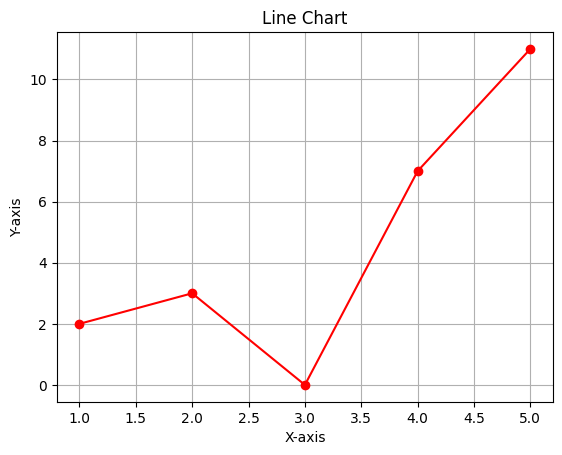

In [2]:
# sample data to plot a graph
x = [1, 2, 3, 4, 5]
y = [2, 3, 0, 7, 11]

plt.plot(x, y, color="red", marker="o")  # The data will be (1, 2), (2, 3), (3, 0), (4, 7), (5, 11)
plt.title("Line Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# Pyplot API

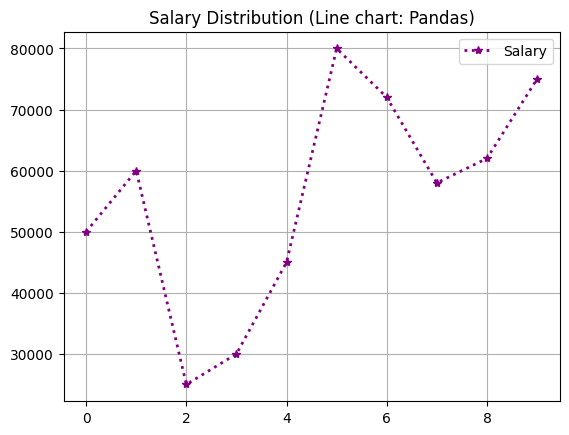

In [3]:
# Univariate numerical (data contains only numbers) data visualization using pandas. It means visualizing a single variable at a time.

data = {
    "Salary": [50000, 60000, 25000, 30000, 45000, 80000, 72000, 58000, 62000, 75000],
}

salary_df = pd.DataFrame(data)

# Using pandas built-in plot function to visualize the salary data
# `linestyle` supports '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted' values
salary_df.plot(
    title="Salary Distribution (Line chart: Pandas)",
    grid=True,
    marker="*",
    color="purple",
    linestyle="dotted",
    linewidth=2,
)
plt.show()

# Lune Chart

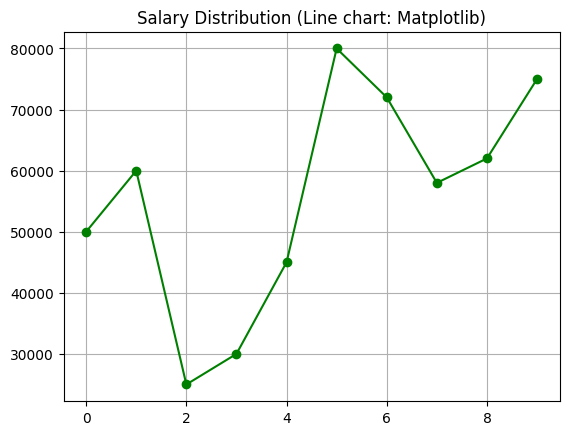

In [4]:
# using matplotlib to plot the same salary data
plt.plot(salary_df["Salary"], marker="o", color="green")
plt.title("Salary Distribution (Line chart: Matplotlib)")
plt.grid(True)
plt.show()

# Histogram

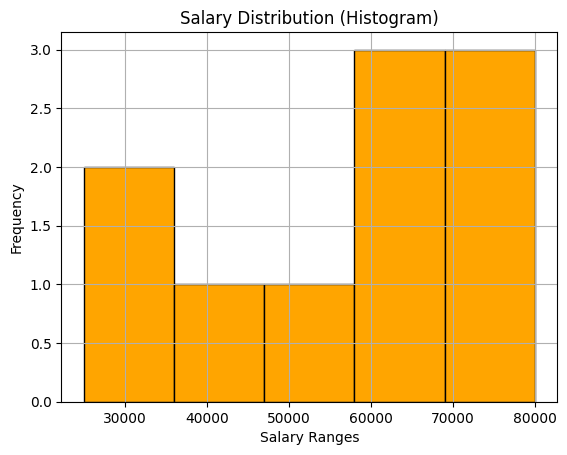

In [5]:
# Histogram
""" 
A histogram is a graphical representation that organizes a group of data points into user-specified ranges.

The term "bins" refers to the intervals or "buckets" into which data points are grouped. 
Essentially, bins determine how the data is divided along the x-axis.

What are Bins?
- A bin represents a range of values, and the histogram will count how many data points fall into each bin.
- The number of bins controls how detailed or coarse the histogram is.
- Fewer bins will give a rough, general overview of the data distribution, 
    while more bins provide a finer, more detailed view.
"""
plt.hist(salary_df["Salary"], bins=5, color="orange", edgecolor="black")
plt.title("Salary Distribution (Histogram)")
plt.xlabel("Salary Ranges")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Box Plot
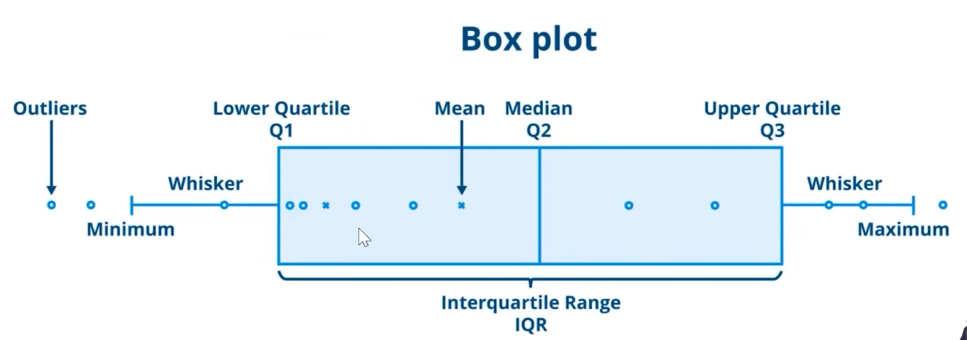

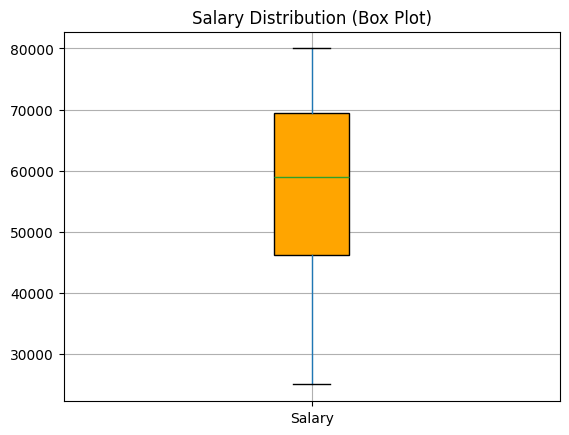

In [6]:
salary_df.boxplot(column="Salary", grid=True, vert=True, patch_artist=True, boxprops=dict(facecolor="orange"))
plt.title("Salary Distribution (Box Plot)")
plt.show()

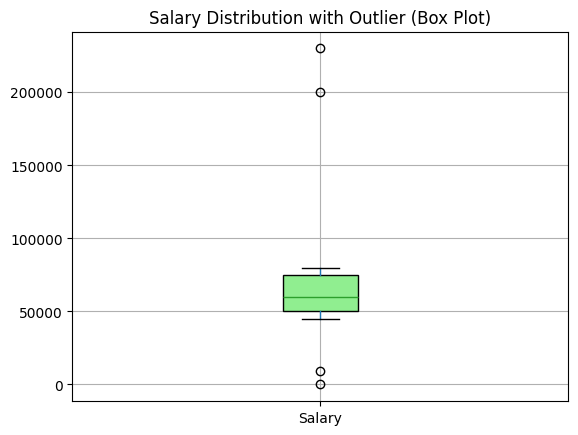

In [7]:
# Add an outlier to see how box plot handles it
salary_df_with_outlier = pd.DataFrame(
    {"Salary": [50000, 60000, 50000, 0, 9000, 45000, 80000, 72000, 58000, 62000, 75000, 200000, 230000]}
)
salary_df_with_outlier.boxplot(
    column="Salary", grid=True, vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen")
)
plt.title("Salary Distribution with Outlier (Box Plot)")
plt.show()

# Univariate Categorical values

In [8]:
# Line chart, histogram, and box plot are effective for univariate numerical data visualization. But for univariate categorical data visualization, bar charts and pie charts are commonly used.
data = {
    "Salary": [
        25000,
        30000,
        37000,
        28000,
        39000,
        48000,
        55000,
        52000,
        35000,
        26000,
        27000,
        31000,
        33000,
        29000,
        40000,
        36000,
        34000,
        45000,
        47000,
        50000,
    ],
    "Dept": ["HR", "Finance", "IT", "HR", "IT", "Finance", "HR", "IT", "Finance", "HR"] * 2,
}

salary_dept_df = pd.DataFrame(data)
salary_dept_df.head()

,Salary,Dept
0,25000,HR
1,30000,Finance
2,37000,IT
3,28000,HR
4,39000,IT


# Pie Chart

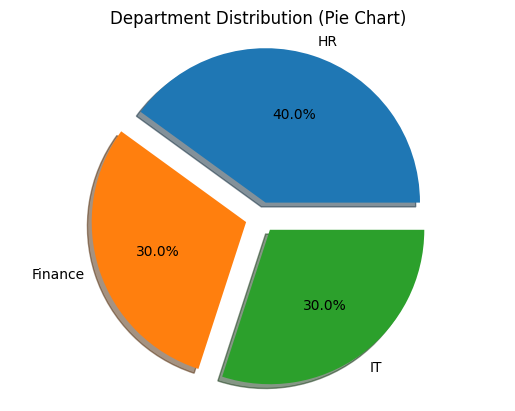

In [9]:
# Pie chart to visualize the department distribution
dept_counts = salary_dept_df["Dept"].value_counts()

# Here `explode` is used to separate the slices a bit for better visibility of each category. As there are three departments, we provide three values in the explode tuple.
# `labels` are taken from the index of dept_counts which contains department names.
# `autopct` is used to display the percentage value on each slice of the pie chart.

plt.pie(dept_counts, labels=dept_counts.index, autopct="%1.1f%%", explode=(0.1, 0.1, 0.1), shadow=True)
plt.title("Department Distribution (Pie Chart)")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Count Plot

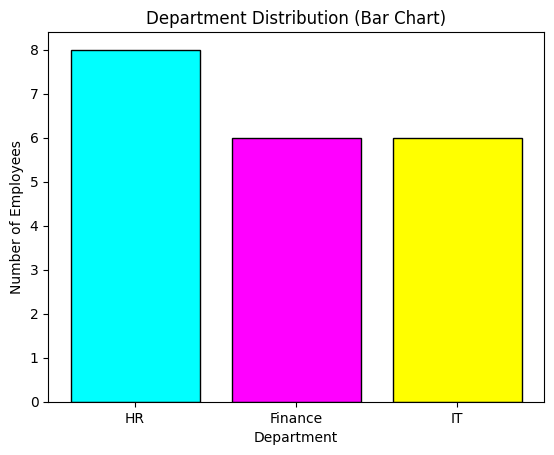

In [10]:
# Count Plot
# dept_counts.plot(kind="bar", color=["cyan", "magenta", "yellow"], edgecolor="black")
plt.bar(dept_counts.index, dept_counts.values, color=["cyan", "magenta", "yellow"], edgecolor="black")
plt.title("Department Distribution (Bar Chart)")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

# Bivariate

In [11]:
# Bivariate data visualization involves analyzing the relationship between two variables. This can be done using scatter plots, line charts, or other methods depending on the nature of the data.

# Let's add one more variable to our existing salary_dept_df DataFrame to visualize the relationship between Salary and Experience.
salary_dept_df["Experience"] = [1, 2, 4, 1.5, 5, 8, 12, 10, 4, 1, 1.2, 2, 3, 1.8, 5.5, 4.5, 3.2, 7, 8, 10]

salary_dept_df.head()

,Salary,Dept,Experience
0,25000,HR,1.0
1,30000,Finance,2.0
2,37000,IT,4.0
3,28000,HR,1.5
4,39000,IT,5.0


# Scatter Plot

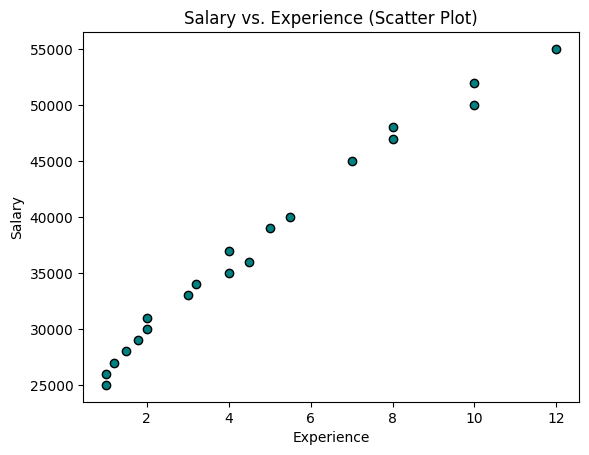

In [12]:
# Scatter Plot will help us visualize the relationship between two variables. Here, we will plot Salary against Experience.
plt.scatter(
    salary_dept_df["Experience"],
    salary_dept_df["Salary"],
    color="teal",
    marker="o",
    edgecolor="black",
)
plt.title("Salary vs. Experience (Scatter Plot)")
plt.xlabel("Experience")
plt.ylabel("Salary")
# plt.grid(True)
plt.show()

# Line Plot

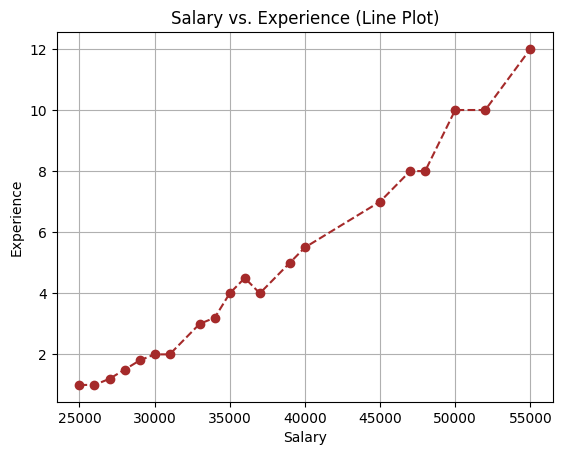

In [13]:
# Line Plot can also be used to visualize trends over a continuous variable. Here, we will sort the data by Experience and plot Salary against it.
sorted_df = salary_dept_df.sort_values(by="Salary")
plt.plot(
    sorted_df["Salary"],
    sorted_df["Experience"],
    marker="o",
    color="brown",
    linestyle="--",
)
plt.title("Salary vs. Experience (Line Plot)")
plt.xlabel("Salary")
plt.ylabel("Experience")
plt.grid(True)
plt.show()

# Bar chart

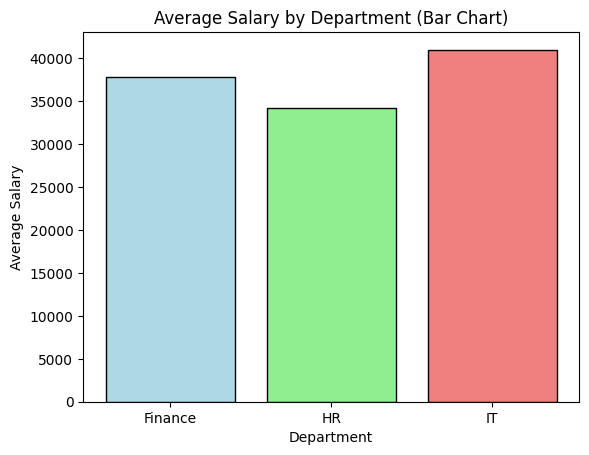

In [14]:
# Bar chart can be used to compare the average between different categories. Here, we will compare the average Salary for each Department.

avg_salary_by_dept = salary_dept_df.groupby("Dept")["Salary"].mean()
plt.bar(
    avg_salary_by_dept.index,
    avg_salary_by_dept.values,
    color=["lightblue", "lightgreen", "lightcoral"],
    edgecolor="black",
)
plt.title("Average Salary by Department (Bar Chart)")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

# Box Plot

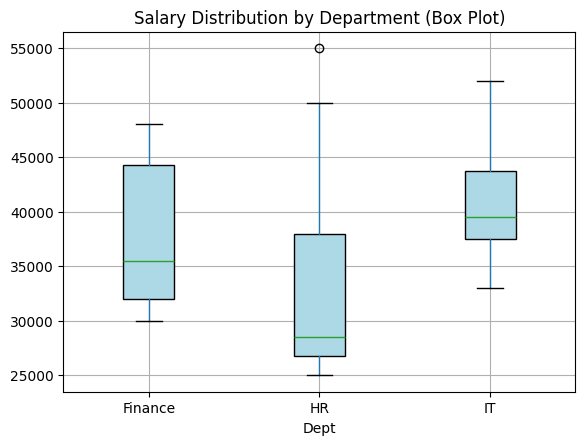

In [15]:
# Box plot can be used to compare the distribution of a numerical variable across different categories. Here, we will compare the Salary distribution across Departments.

# hr_sal = salary_dept_df[salary_dept_df['Dept'] == 'HR']['Salary']
# it_sal = salary_dept_df[salary_dept_df['Dept'] == 'IT']['Salary']
# fin_sal = salary_dept_df[salary_dept_df['Dept'] == 'Finance']['Salary']

# plt.boxplot([hr_sal, it_sal, fin_sal], labels=['HR', 'IT', 'Finance'])

salary_dept_df.boxplot(
    column="Salary", by="Dept", grid=True, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue")
)
plt.title("Salary Distribution by Department (Box Plot)")
plt.suptitle("")  # To remove the automatic 'Boxplot grouped by Dept' title
plt.show()

# Pie chart

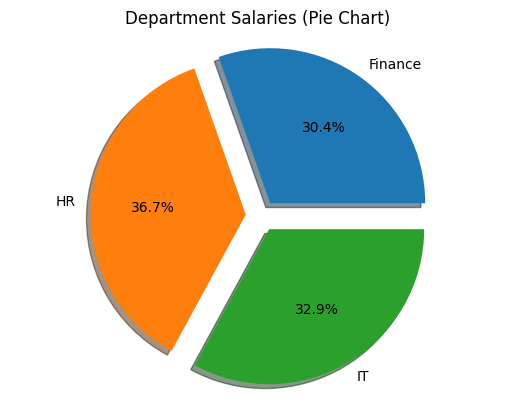

In [16]:
# Pie Chart for salary and Dept
salary_by_dep = salary_dept_df.groupby("Dept")["Salary"].sum()

plt.pie(salary_by_dep, labels=salary_by_dep.index, autopct="%1.1f%%", explode=(0.1, 0.1, 0.1), shadow=True)
plt.title("Department Salaries (Pie Chart)")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar plot

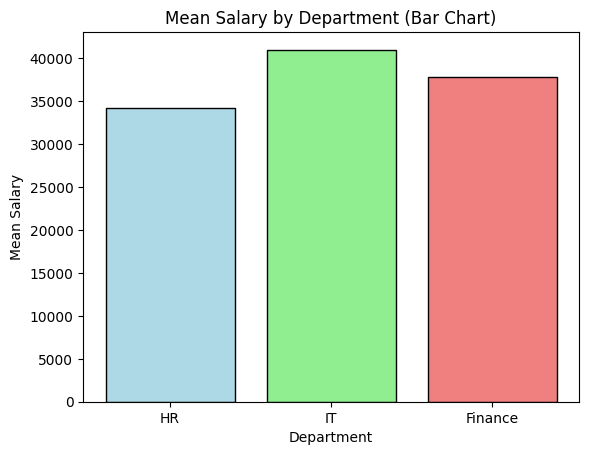

In [17]:
# Bar plot

hr_sal = salary_dept_df[salary_dept_df["Dept"] == "HR"]["Salary"]
it_sal = salary_dept_df[salary_dept_df["Dept"] == "IT"]["Salary"]
fin_sal = salary_dept_df[salary_dept_df["Dept"] == "Finance"]["Salary"]

hr_mean = sum(hr_sal) / len(hr_sal)
it_mean = sum(it_sal) / len(it_sal)
fin_mean = sum(fin_sal) / len(fin_sal)

plt.bar(
    ["HR", "IT", "Finance"],
    [hr_mean, it_mean, fin_mean],
    color=["lightblue", "lightgreen", "lightcoral"],
    edgecolor="black",
)
plt.title("Mean Salary by Department (Bar Chart)")
plt.xlabel("Department")
plt.ylabel("Mean Salary")
plt.show()

# Multivariate Analysis

In [18]:
# let's add Age column to do Multivariate Analysis
# salary_dept_df["Age"] = np.random.randint(25, 51, size=len(salary_dept_df))
salary_dept_df["Age"] = [22, 25, 29, 24, 30, 35, 40, 36, 28, 22, 23, 25, 26, 24, 31, 29, 27, 33, 35, 38]
salary_dept_df.head()

,Salary,Dept,Experience,Age
0,25000,HR,1.0,22
1,30000,Finance,2.0,25
2,37000,IT,4.0,29
3,28000,HR,1.5,24
4,39000,IT,5.0,30


# Bubble plot

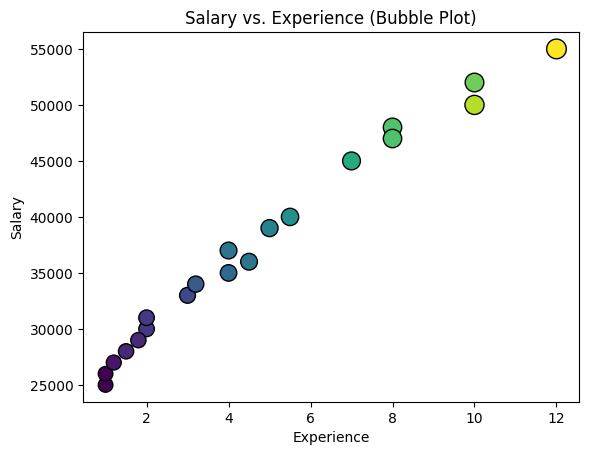

In [19]:
# Bubble plot Salary vs. Experience
plt.scatter(
    salary_dept_df["Experience"],
    salary_dept_df["Salary"],
    s=salary_dept_df["Age"] * 5,
    c=salary_dept_df["Age"],
    cmap="viridis",
    edgecolor="black",
)
plt.title("Salary vs. Experience (Bubble Plot)")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

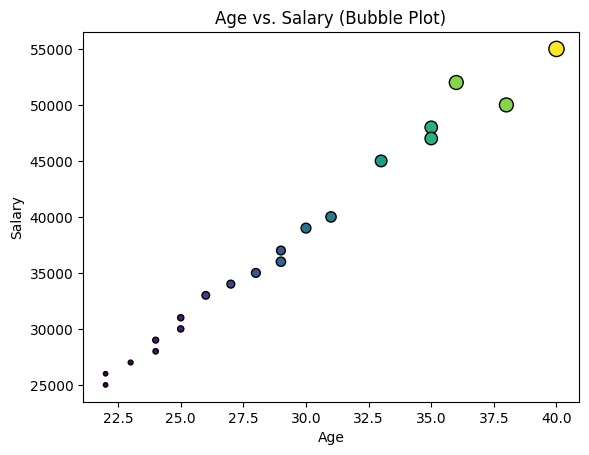

In [20]:
# Bubble plot for Age vs Salary
plt.scatter(
    salary_dept_df["Age"],
    salary_dept_df["Salary"],
    s=salary_dept_df["Experience"] * 10,
    c=salary_dept_df["Experience"],
    cmap="viridis",
    edgecolor="black",
)
plt.title("Age vs. Salary (Bubble Plot)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

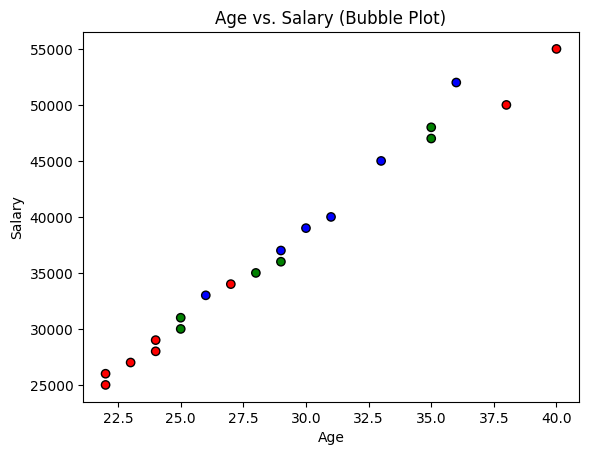

In [48]:
# 2 numerical and 1 categorical column example

plt.scatter(
    salary_dept_df["Age"],
    salary_dept_df["Salary"],
    # s=100,
    edgecolor="black",
    c=salary_dept_df["Dept"].map({"HR": "red", "Finance": "green", "IT": "blue"}),
    label=["HR", "Finance", "IT"],
)
plt.title("Age vs. Salary (Bubble Plot)")
plt.xlabel("Age")
plt.ylabel("Salary")
# plt.legend()  # To add legend we have to plot Dept data separately for each Dept.
plt.show()

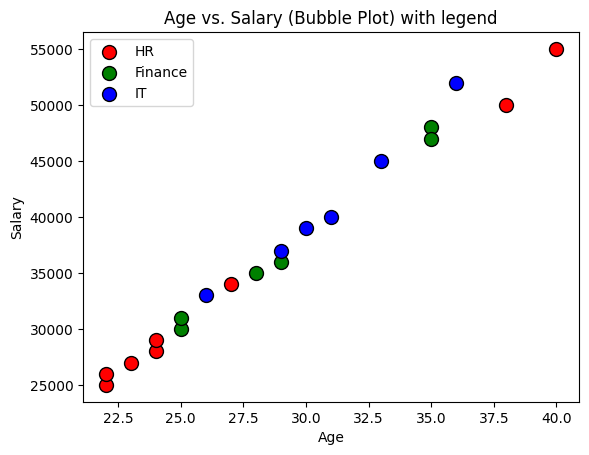

In [49]:
# 2 numerical and 1 categorical column example with legend

colors = {"HR": "red", "Finance": "green", "IT": "blue"}
for dept, color in colors.items():
    df_dept = salary_dept_df[salary_dept_df["Dept"] == dept]
    plt.scatter(df_dept["Age"], df_dept["Salary"], s=100, edgecolor="black", c=color, label=dept)
plt.legend()
plt.title("Age vs. Salary (Bubble Plot) with legend")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

# Object Oriented plot

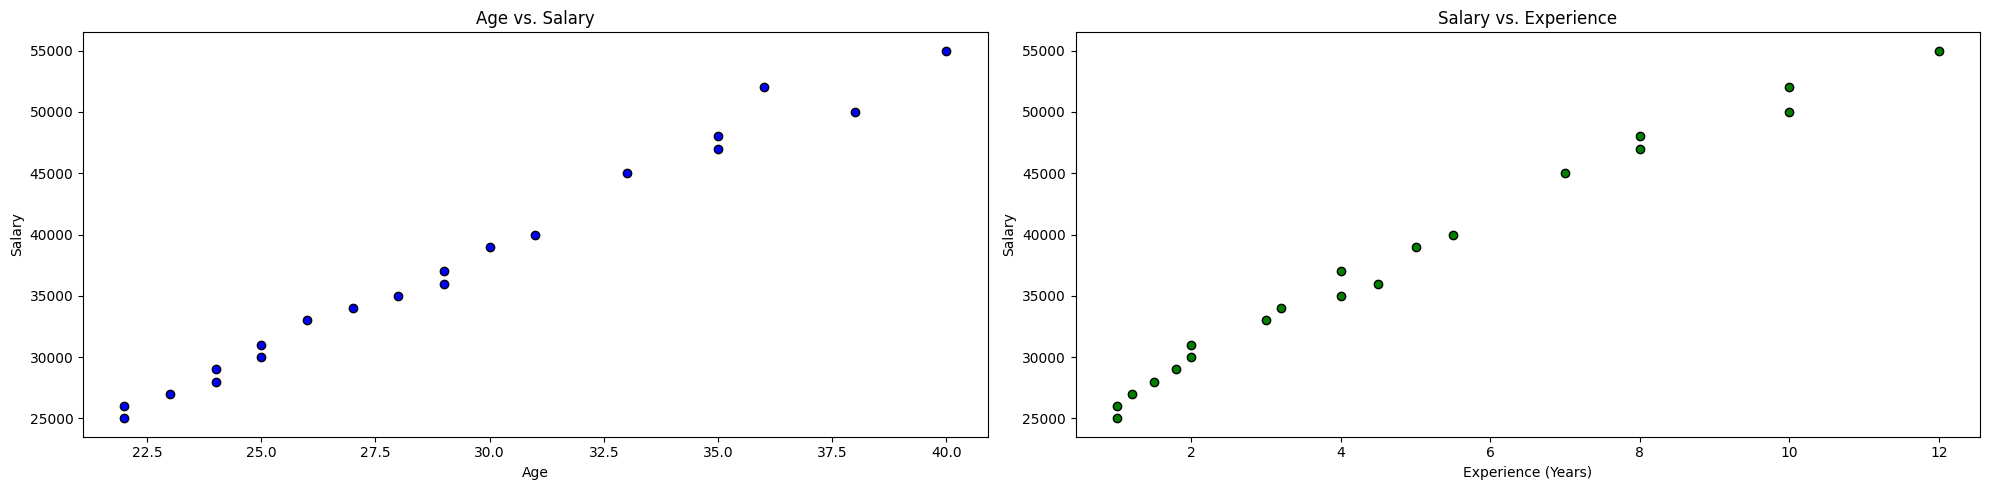

In [56]:
# Object Oriented plot: Multiple and Sub plots in single figure

# Create a subplot grid (1 rows, 2 column)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # One rows, two column
axes[0].scatter(salary_dept_df["Age"], salary_dept_df["Salary"], c="blue", edgecolor="black")
axes[0].set_title("Age vs. Salary")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Salary")

# Plot 2: Salary vs. Experience
axes[1].scatter(salary_dept_df["Experience"], salary_dept_df["Salary"], c="green", edgecolor="black")
axes[1].set_title("Salary vs. Experience")
axes[1].set_xlabel("Experience (Years)")
axes[1].set_ylabel("Salary")

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

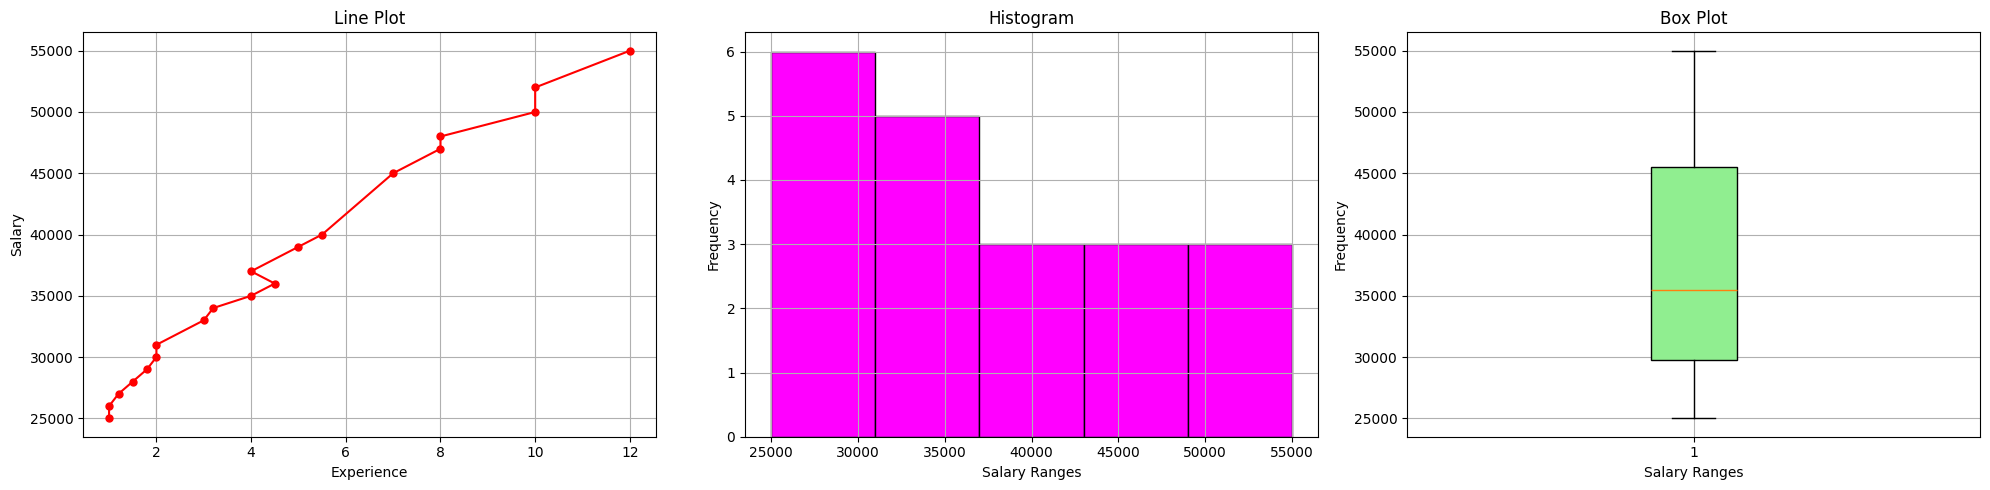

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # One rows, three column

# Line plot
axes[0].plot(sorted_df["Experience"], sorted_df["Salary"], color="red", marker="o", markersize=5)
axes[0].set_title("Line Plot")
axes[0].set_xlabel("Experience")
axes[0].set_ylabel("Salary")
axes[0].grid()

# Histogram
axes[1].hist(sorted_df["Salary"], bins=5, color="magenta", edgecolor="black")
axes[1].set_title("Histogram")
axes[1].set_xlabel("Salary Ranges")
axes[1].set_ylabel("Frequency")
axes[1].grid()

# Box plot
axes[2].boxplot(sorted_df["Salary"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
axes[2].set_title("Box Plot")
axes[2].set_xlabel("Salary Ranges")
axes[2].set_ylabel("Frequency")
axes[2].grid()
# Adjust layout for better spacing between plots
plt.tight_layout()
# plt.savefig("multiple_plots.png")   # To save the figure to a file inside the current working directory
plt.show()

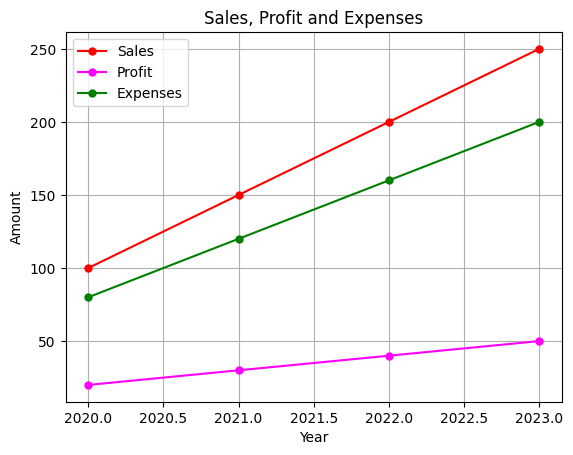

In [72]:
data = {
    "Year": [2020, 2021, 2022, 2023],
    "Sales": [100, 150, 200, 250],
    "Profit": [20, 30, 40, 50],
    "Expenses": [80, 120, 160, 200],
}

# Visualized multiple variables in one plot

df = pd.DataFrame(data)

plt.plot(df["Year"], df["Sales"], color="red", marker="o", markersize=5)
plt.plot(df["Year"], df["Profit"], color="magenta", marker="o", markersize=5)
plt.plot(df["Year"], df["Expenses"], color="green", marker="o", markersize=5)
plt.title("Sales, Profit and Expenses")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend(["Sales", "Profit", "Expenses"])
plt.grid()
plt.show()

# 3D plot

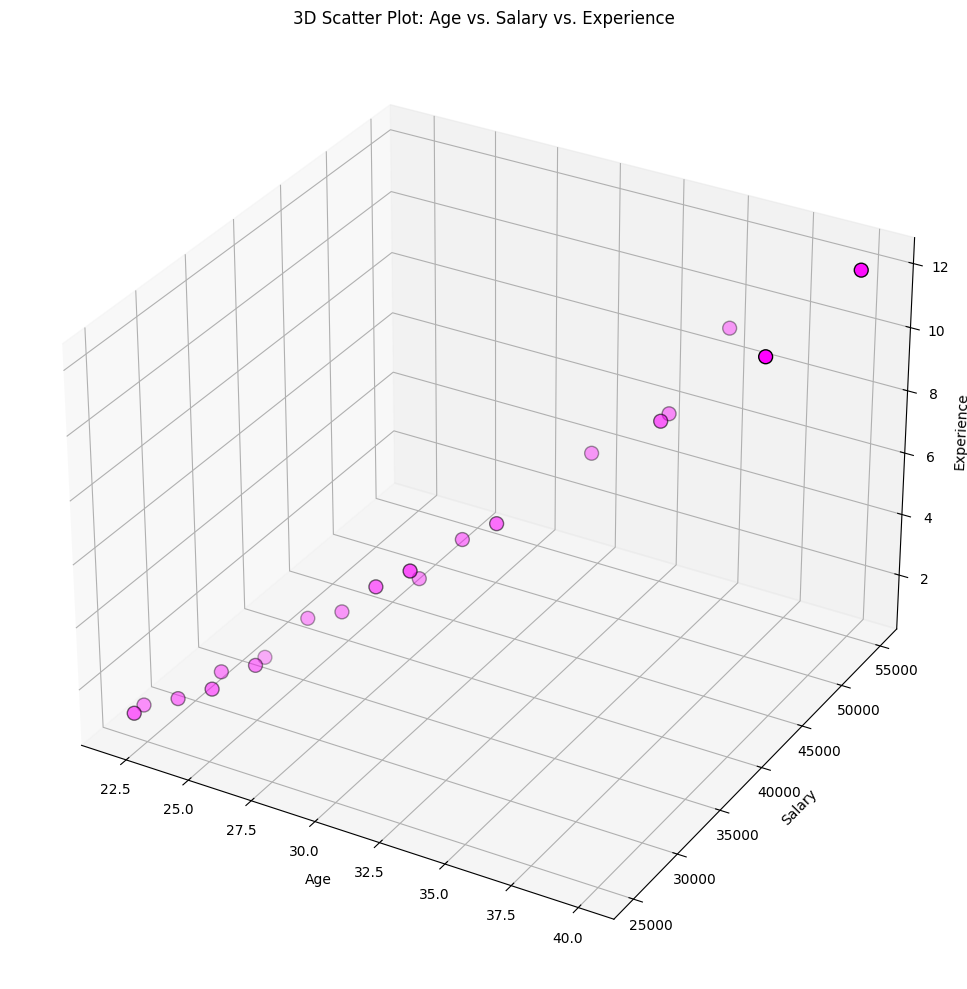

In [86]:
# 3D Plot
# fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # One rows, three column
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    salary_dept_df["Age"],
    salary_dept_df["Salary"],
    salary_dept_df["Experience"],
    c="magenta",
    edgecolor="black",
    marker="o",
    s=100,
)
ax.set_title("3D Scatter Plot: Age vs. Salary vs. Experience")
ax.set_xlabel("Age")
ax.set_ylabel("Salary")
ax.set_zlabel("Experience")
plt.tight_layout()
plt.show()